In [ ]:
# DEMO CELL 1: Mount Google Drive and Import Libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import zipfile
import shutil # For potentially cleaning up the extraction directory

Mounted at /content/drive


In [ ]:
# DEMO CELL 2: Define Paths and Constants
# ADJUST THESE PATHS to match Google Drive structure
MODEL_PATH_DEMO = '/content/drive/MyDrive/CornLeaf_EfficientNetv2b2.keras' # Path to saved  model
TEST_ZIP_PATH_DEMO = '/content/drive/MyDrive/CS180 Project Test Sets/corn_test.zip' # Path to corn_test.zip

# Paths for extracting the test images within this Colab session
EXTRACT_TO_PATH_DEMO = '/content/corn_test_extracted_demo/' # Use a distinct name for demo extraction
TEST_IMAGE_FOLDER_DEMO = os.path.join(EXTRACT_TO_PATH_DEMO, 'corn_test') # Path to the folder containing test images

# Model input image dimensions
IMG_WIDTH_DEMO = 260
IMG_HEIGHT_DEMO = 260
CLASS_NAMES_DEMO = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'] # Must match training

In [ ]:
# DEMO CELL 3: Unzip the Test Set (Self-contained for the demo)
if os.path.exists(TEST_IMAGE_FOLDER_DEMO):
    print(f"Test images folder already exists at {TEST_IMAGE_FOLDER_DEMO}. Using existing files.")
else:
    if os.path.exists(EXTRACT_TO_PATH_DEMO):
        shutil.rmtree(EXTRACT_TO_PATH_DEMO) # Clean up if main extraction folder exists but not the specific one
    os.makedirs(EXTRACT_TO_PATH_DEMO, exist_ok=True)

    if os.path.exists(TEST_ZIP_PATH_DEMO):
        print(f"Extracting test images from {TEST_ZIP_PATH_DEMO}...")
        with zipfile.ZipFile(TEST_ZIP_PATH_DEMO, 'r') as zip_ref:
            zip_ref.extractall(EXTRACT_TO_PATH_DEMO)
        print(f"Test images extracted to {TEST_IMAGE_FOLDER_DEMO}")
    else:
        print(f"ERROR: Test ZIP file not found at {TEST_ZIP_PATH_DEMO}. Please check the path.")

# Verify extraction
if os.path.exists(TEST_IMAGE_FOLDER_DEMO):
    print(f"Found {len(os.listdir(TEST_IMAGE_FOLDER_DEMO))} files in {TEST_IMAGE_FOLDER_DEMO}")
else:
    print(f"Error: {TEST_IMAGE_FOLDER_DEMO} not found after attempting to extract. Cannot proceed with demo.")

Test images folder already exists at /content/corn_test_extracted_demo/corn_test. Using existing files.
Found 838 files in /content/corn_test_extracted_demo/corn_test


In [ ]:
# DEMO CELL 4: Load the Trained Model
loaded_model_demo = None # Initialize to None
if os.path.exists(MODEL_PATH_DEMO):
    try:
        loaded_model_demo = tf.keras.models.load_model(MODEL_PATH_DEMO)
        print(f"Demo model loaded successfully from {MODEL_PATH_DEMO}")
    except Exception as e:
        print(f"Error loading demo model: {e}")
        print("Please ensure the MODEL_PATH_DEMO is correct and the model file exists.")
else:
    print(f"ERROR: Model file not found at {MODEL_PATH_DEMO}. Cannot proceed with demo.")

Demo model loaded successfully from /content/drive/MyDrive/CornLeaf_EfficientNetv2b2.keras


In [ ]:
# DEMO CELL 5: Preprocessing and Prediction Functions for Demo
def preprocess_single_image_for_demo(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized_for_display = img.resize((IMG_WIDTH_DEMO, IMG_HEIGHT_DEMO))
        img_array = tf.keras.utils.img_to_array(img_resized_for_display)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        return img_array, img_resized_for_display
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

def predict_single_image_class(img_array):
    if img_array is not None and loaded_model_demo is not None:
        try:
            predictions = loaded_model_demo.predict(img_array, verbose=0)
            predicted_class_index = np.argmax(predictions[0])
            predicted_class_name = CLASS_NAMES_DEMO[predicted_class_index]
            confidence = np.max(predictions[0]) * 100
            return predicted_class_name, confidence
        except Exception as e:
            print(f"Error during prediction: {e}")
            return "Prediction Error", 0.0
    elif loaded_model_demo is None:
        return "Model Not Loaded", 0.0
    else:
        return "Preprocessing Error", 0.0

--- Demonstrating with image: /content/corn_test_extracted_demo/corn_test/1.jpeg ---


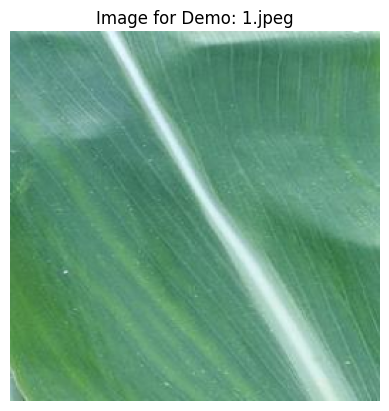


Predicted Class: Healthy
Confidence: 100.00%


In [ ]:
# DEMO CELL 6: Specify Image from Test Set and Predict
# --- CHANGE 'image_filename_to_demo' FOR DEMONSTRATION ---
image_filename_to_demo = '1.jpeg'  # Example: '0.jpeg', '15.jpeg', '123.jpeg', etc.
# Ensure this filename exists in 'corn_test' folder.
# --------------------------------------------------------------------------

if loaded_model_demo and os.path.exists(TEST_IMAGE_FOLDER_DEMO): # Check if model loaded and folder exists
    image_path_to_demo = os.path.join(TEST_IMAGE_FOLDER_DEMO, image_filename_to_demo)

    if not os.path.exists(image_path_to_demo):
        print(f"ERROR: The specified image '{image_filename_to_demo}' was not found in '{TEST_IMAGE_FOLDER_DEMO}'.")
        print(f"Please check the filename. Available files (up to 5): {os.listdir(TEST_IMAGE_FOLDER_DEMO)[:5] if os.listdir(TEST_IMAGE_FOLDER_DEMO) else 'No files found'}")
    else:
        print(f"--- Demonstrating with image: {image_path_to_demo} ---")
        image_array_demo, original_image_display = preprocess_single_image_for_demo(image_path_to_demo)

        if image_array_demo is not None and original_image_display is not None:
            plt.imshow(original_image_display)
            plt.axis('off')
            plt.title(f"Image for Demo: {image_filename_to_demo}")
            plt.show()

            predicted_class, confidence_score = predict_single_image_class(image_array_demo)
            print(f"\nPredicted Class: {predicted_class}")
            print(f"Confidence: {confidence_score:.2f}%")
        else:
            print(f"Could not process the image: {image_filename_to_demo}")
elif not loaded_model_demo:
    print("Demo cannot run because the model was not loaded successfully.")
elif not os.path.exists(TEST_IMAGE_FOLDER_DEMO):
    print("Demo cannot run because the test image folder was not found or extracted correctly.")